<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_9_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We begin unsupervised estimators.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful for


*   visualization
*   noise filtering
*   feature extraction and engineering



In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Introducing Principal Component Analysis

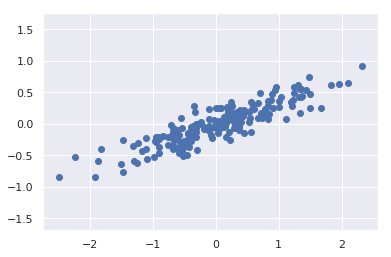

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');